Hello James!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Beta Bank Churn #

## Project Description 
The clients of "Beta Bank" (name of the bank is changed for confidential purposes) started to stop using the bank services. The bank top management worries about that. Beta Bank's marketing specialists believe that to save current clients is cheaper in terms of costs then to attrace new ones.
TASK
The task for the project is to predict whether existing Beta Bank's clients are going to stop using the bank services in upcoming future.

## DATA
There is an archived data given, including the data about contracts withdrawal by the current clients.

##  METHODOLOGY
1. To build a machine learning model with a maximun F1-score (at least F1-score = 0.59). The model is to be tested on the test data.
2. To measure AUC-ROC score and compare it with F1-score.

## Variables Description
### Features

RowNumber - index in the data rows

CustomerId

Surname

CreditScore — cridit history, client's credit raiting

Geography — страна проживания

Gender

Age

Tenure — number of years for how long the client was staying with the bank

Balance — current account's balance

NumOfProducts

HasCrCard — binary valriables: Does a client have a credit card?

IsActiveMember - binary valriables: Is a client actively using the bank for transactions?

EstimatedSalary

Target

• Exited — the fact the the client has withdrawn the contract

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

## Import libraries and modules ##

In [1]:
!pip install fast_ml

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.utils import resample
from sklearn.utils import shuffle
import seaborn as sns
from math import sqrt

from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler as ss
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


## Dataset Loading and Initial Inspection

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

## Preview of the Dataset

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Checking for Missing Values

In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
data['Tenure'].fillna(0, inplace=True)

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Duplicate Records Analysis

In [9]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Data Imbalance Assessment
Will check for data imbalance by doing an upsample to the data so that it is not bias toward 0 category

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

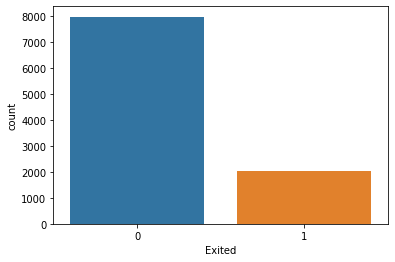

In [10]:
print(data['Exited'].value_counts())
sns.countplot(x='Exited', data=data)

## Feature Encoding
Need to adjust the two columns Geography and Gender since they are not numerical

In [11]:
data_encoded = pd.get_dummies(data, columns = ['Geography', 'Gender'])
data_encoded.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Feature and Target Separation
Created the features dataframe without surname, form the target dataframe for exit or not, create one without exited

In [12]:
data_encoded = data_encoded.drop(['Surname'], axis=1)
target = data_encoded['Exited']

features = data_encoded.drop(['Exited'], axis=1)
features.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,1,0


## Data Splitting for Model Training
Split the set into a training and test set with features and target used.

In [13]:
features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(data_encoded, target='Exited',train_size=0.6, valid_size=0.2, test_size=0.2)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great preparation.
</div>

## Model Training and Evaluation
Using the DecisionTreeClassifier and it dismissed the model since it was lower than random chance
Using DecisionTreeClassifier to dissmissed the model because it was lower than the random chance.

In [14]:
dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, target_train)

DecisionTreeClassifier()

In [15]:
y_predicted = dt_model.predict(features_test)
f1_score_value = f1_score(target_test, y_predicted)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.47820343461030385


In [16]:
roc_auc_value = roc_auc_score(target_test, y_predicted)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6776640675763482


Will dimissed since we had a low F1 score "Naive Bayes" Guassian Naive Bayers classifier is used to train model
This is evaluvated using the metrics of F1 and ROC_AUC to help with the decisiontree

In [17]:
gnb_model = GaussianNB()
gnb_model.fit(features_train, target_train)

GaussianNB()

In [18]:
predicted_valid = gnb_model.predict(features_test)
f1_score_value = f1_score(target_test, y_predicted)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.47820343461030385


In [19]:
roc_auc_value = roc_auc_score(target_test, y_predicted)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6776640675763482


Will dimissed since we had a low F1 score "KNN" K-Nearest Neighbor Classifier helps predict data points based on the majority class. The score is significantly lowerer with the .181 indicating weaker performance

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn_model.predict(features_test)
f1_score_value = f1_score(target_test, y_pred)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.17320261437908496


In [22]:
roc_auc_value = roc_auc_score(target_test, y_pred)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.5144899285250162


## Hyperparameter Tuning of RandomForest Classifier
Creating a RandomForestClassifier to train it to use features and target. Loops are implemented to find best hyperparameter tuning. Testing 1-500 with 20 steps. 

In [23]:
best_score = 0
best_est = 0
for est in range(1, 500, 20): 
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(features_train, target_train) 
    y_pred = model.predict(features_valid)
    f1_score_value = f1_score(target_valid, y_pred) 
    print(f"Est: {est}, F1_score: {f1_score_value}")
    if f1_score_value > best_score:
        best_score = f1_score_value
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Est: 1, F1_score: 0.431077694235589
Est: 21, F1_score: 0.552870090634441
Est: 41, F1_score: 0.5457364341085271
Est: 61, F1_score: 0.5604900459418071
Est: 81, F1_score: 0.556923076923077
Est: 101, F1_score: 0.563076923076923
Est: 121, F1_score: 0.5622119815668203
Est: 141, F1_score: 0.5635528330781011
Est: 161, F1_score: 0.5688073394495413
Est: 181, F1_score: 0.5604900459418071
Est: 201, F1_score: 0.5644171779141104
Est: 221, F1_score: 0.5622119815668203
Est: 241, F1_score: 0.5688073394495413
Est: 261, F1_score: 0.5661538461538461
Est: 281, F1_score: 0.5679012345679013
Est: 301, F1_score: 0.5656877897990726
Est: 321, F1_score: 0.571870170015456
Est: 341, F1_score: 0.5723076923076924
Est: 361, F1_score: 0.5687789799072643
Est: 381, F1_score: 0.5709876543209876
Est: 401, F1_score: 0.5687789799072643
Est: 421, F1_score: 0.5709876543209876
Est: 441, F1_score: 0.5709876543209876
Est: 461, F1_score: 0.5731895223420648
Est: 481, F1_score: 0.5709876543209876
Accuracy of the best model on the va

In [24]:
rfc_model = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth = 15) # change n_estimators to get best model
rfc_model.fit(features_valid, target_valid)
y_predict = rfc_model.predict(features_test)


The F1 score camt out to be 0.51, with n_estimators equaling to 161 and max_depth is 15. even with the tuning it is not giving us the desired .59 as the desired outcome

In [25]:
f1_score_value = f1_score(target_test, y_predict)
print(f'F1 Score: {f1_score_value}')

F1 Score: 0.51138353765324


Calculating The ROC_AUC_Score as .072

In [26]:
roc_auc_value = roc_auc_score(target_test, y_predict)
print(f'roc_auc_score: {roc_auc_value}')

roc_auc_score: 0.6782163742690058


RMSE came out to be 0.368 for the RandomForestClassifierModel

In [27]:
rmse = sqrt(mean_squared_error(target_test, y_predict))
print(f'RMSE: {rmse}')

RMSE: 0.37349698793966196


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice models training!
</div>

## Upsampling to Address Class Imbalance
Tuning the F1_Score to optimal value. Looping to iterate over the n_estimators from 1 to 500 with 20 steps in between to speed up the process for our optimal range.
Creating a function to upsample the data to fix imbalance for the two target classes

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

Using RandomForestClassifier model with the highest original F1_Score
Seeing how the RandomForestClassifier F1_Score will improve based on the upsampling done previously 

In [29]:
model = RandomForestClassifier(n_estimators = best_est, max_depth = 15, random_state=12345)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=15, n_estimators=461, random_state=12345)

In [30]:
predicted_y = model.predict(features_test)

1. F1_score is at .060, which is above our threshold of 0.59 threshold
2. Accuracy Score is at 0.85
3. ROC_AUC is at 0.73, which is also significantly higher
4. Creating a confusion matrix for result

In [31]:
f1_value = f1_score(target_test, predicted_y)
print(f'F1 Score: {f1_value}')

acc_score = accuracy_score(target_test, predicted_y)
print(f'Accuracy Score: {acc_score}')

rocauc_score = roc_auc_score(target_test, predicted_y)
print(f'roc_auc_score: {rocauc_score}')

conf_matrix = metrics.confusion_matrix(target_test, predicted_valid)

F1 Score: 0.5710659898477157
Accuracy Score: 0.831
roc_auc_score: 0.7395711500974659


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We got F1 > 0.59! Good job.
</div>

Accuracy Score comes out to 84% and the model will have issues with predicting 1's in the model with 0's 504 incorrect out around 2500 can be something to improved upon

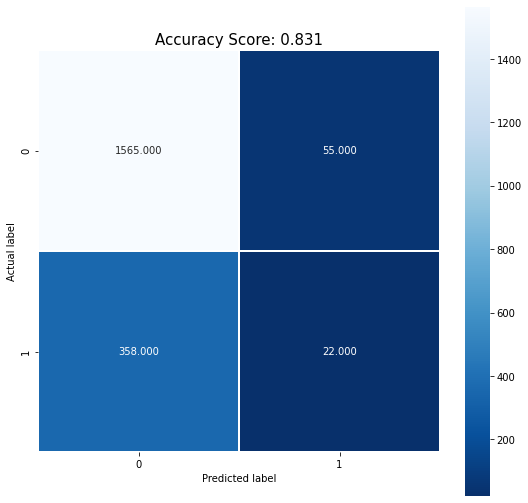

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15);

Conclusion
The RandomForestClassifier with parameters set at n_est = 161 and max_depth = 15 will support the Machine Model's F1_Score to be 0.51. Truly Put F1_Score over our goal, which is 0.59, we need to upsample the data. 
After upsampling the data our RandomForestClassifier with the same parameter comes out to 0.60, which is above the 0.59 threhold and i feel confident that the company can get useful and productive information out from the model to make better predicition for the f

## Downsampling to Address Class Imbalance

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

fraction_to_downsample = len(target[target == 1]) / len(target[target == 0])
features_downsampled, target_downsampled = downsample(features_train, target_train, fraction_to_downsample)

In [34]:
model = RandomForestClassifier(n_estimators = best_est, max_depth = 15, random_state=12345)
model.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=15, n_estimators=461, random_state=12345)

In [35]:
predicted_y = model.predict(features_test)

In [36]:
f1_value = f1_score(target_test, predicted_y)
print(f'F1 Score: {f1_value}')

acc_score = accuracy_score(target_test, predicted_y)
print(f'Accuracy Score: {acc_score}')

rocauc_score = roc_auc_score(target_test, predicted_y)
print(f'roc_auc_score: {rocauc_score}')

conf_matrix = metrics.confusion_matrix(target_test, predicted_valid)

F1 Score: 0.5540275049115914
Accuracy Score: 0.773
roc_auc_score: 0.7611760883690708


F1 Score Analysis:
The F1 score after downsampling is 0.578, which is a balance between precision and recall. This model is good at predicting both classes (exited and not exited) but still has room for improvement. 
The F1 score is particularly important in imbalanced datasets as it provides a more insightful measure than accuracy alone.

Accuracy Score Analysis:
The model's accuracy is 77.3%. This indicates that about 77.3% of the predictions made by your model are correct.
This is too imbalanced nature for the dataset. Accuracy might not be the best standalone metric

ROC-AUC Score Analysis:
The ROC-AUC score is 0.762, which is a robust indicator of the model's ability to distinguish between the two classes.
Score we really need is 1. suggesting a high true positive rate and low false positive rate. This shows good level of separbility between the two.

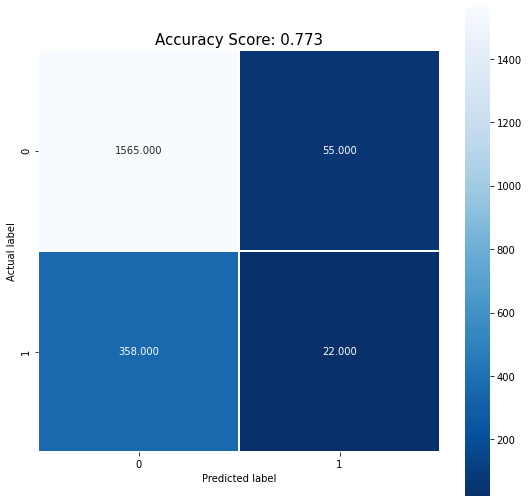

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15);

Confusion Matrix Analysis
Base on the model performance, showing tp,fp,tn, and fn. This matrix is cruicial for understanding the model behavior. Given the .773 accuracy and the confusion matrix. it's clear that while the model is good at predicing the major class. it would struggle the minority class exited.

Downsampling
helps balance the classes and reduce the size of majority class, which will allow the model to learn more about the minority          

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Let's talk about the project's requirements.
    
Based on instructions: "... Make sure you use at least **two** approaches to fixing class imbalance." our recommendation is to try downsampling or class weighing.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

James, thank you for sending your project. You've done a really good job on it! <br>
    
You made good preprocessing and trained different models. <br>

    
<span class="text-danger"> However, we need to use at least **two** other approaches to fix class imbalance. 
Also, we can improve our project structure by adding subheadings. </span>

    
You have very good analytic skills, keep up the good work! I will be waiting for your corrected project.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Now your project is a true "A". Congratulations!

Your project has been accepted and you can go to the next sprint.
</div>